In [ ]:
# connecting to google drive for dataset and other files

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# kaggle data: https://www.kaggle.com/datasets/kingburrito666/shakespeare-plays

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Shakespeare_data.csv")
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [ ]:
del [df['Player'],df['Dataline'],df['PlayerLinenumber'],df['ActSceneLine']]
df.head()

,Play,PlayerLine
0,Henry IV,ACT I
1,Henry IV,SCENE I. London. The palace.
2,Henry IV,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,Henry IV,"So shaken as we are, so wan with care,"
4,Henry IV,"Find we a time for frighted peace to pant,"


In [ ]:
df['Play'].value_counts()

Hamlet                      4244
Coriolanus                  3992
Cymbeline                   3958
Richard III                 3941
Antony and Cleopatra        3862
King Lear                   3766
Othello                     3762
Troilus and Cressida        3711
A Winters Tale              3489
Henry VIII                  3419
Henry V                     3395
Henry VI Part 2             3334
Romeo and Juliet            3313
Henry IV                    3205
Henry VI Part 3             3138
Alls well that ends well    3083
Measure for measure         2998
Loves Labours Lost          2986
Henry VI Part 1             2983
Richard II                  2937
Merry Wives of Windsor      2831
As you like it              2822
Taming of the Shrew         2806
Merchant of Venice          2802
Julius Caesar               2771
King John                   2766
Titus Andronicus            2726
Much Ado about nothing      2704
Timon of Athens             2662
Twelfth Night               2648
Pericles  

In [ ]:
requires = {'Hamlet':0,'Coriolanus':1,'Cymbeline':2,'Richard III':3,'Antony and Cleopatra':4,
            'King Lear':5,'Othello':6,'Troilus and Cressida':7,'A Winters Tale':8,'Henry VIII':9,

            'Henry V':10,'Henry VI Part 2':11,'Romeo and Juliet':12,'Henry IV':13,'Henry VI Part 3':14,
            'Alls well that ends well':15,'Measure for measure':16,'Loves Labours Lost':17,'Henry VI Part 1':18,'Richard II':19,

            'Merry Wives of Windsor':20,'As you like it':21,'Taming of the Shrew':22,'Merchant of Venice':23,'Julius Caesar':24,
            'King John':25,'Titus Andronicus':26,'Much Ado about nothing':27,'Timon of Athens':28,'Twelfth Night':29,

            'Pericles':30,'macbeth':31,'The Tempest':32,'Two Gentlemen of Verona':33,'A Midsummer nights dream':34,'A Comedy of Errors':35
            }
df = df[df['Play'].isin(requires)]
df.head()

,Play,PlayerLine
0,Henry IV,ACT I
1,Henry IV,SCENE I. London. The palace.
2,Henry IV,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,Henry IV,"So shaken as we are, so wan with care,"
4,Henry IV,"Find we a time for frighted peace to pant,"


In [ ]:
df['Play'] = df['Play'].map(requires)
df.head()

,Play,PlayerLine
0,13,ACT I
1,13,SCENE I. London. The palace.
2,13,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,13,"So shaken as we are, so wan with care,"
4,13,"Find we a time for frighted peace to pant,"


In [ ]:
df.sample(frac=1).reset_index(drop=True,inplace=True)
print(df)

        Play                                         PlayerLine
0         13                                              ACT I
1         13                       SCENE I. London. The palace.
2         13  Enter KING HENRY, LORD JOHN OF LANCASTER, the ...
3         13             So shaken as we are, so wan with care,
4         13         Find we a time for frighted peace to pant,
...      ...                                                ...
111391     8         Lead us from hence, where we may leisurely
111392     8              Each one demand an answer to his part
111393     8     Perform'd in this wide gap of time since first
111394     8             We were dissever'd: hastily lead away.
111395     8                                             Exeunt

[111396 rows x 2 columns]


In [ ]:
stop_word=nltk.corpus.stopwords.words('english')
stop_word.extend([',','?','""',"''",'.','!', "'",'"',"'d","'ll",'[',']','--',':',';','///','$'])

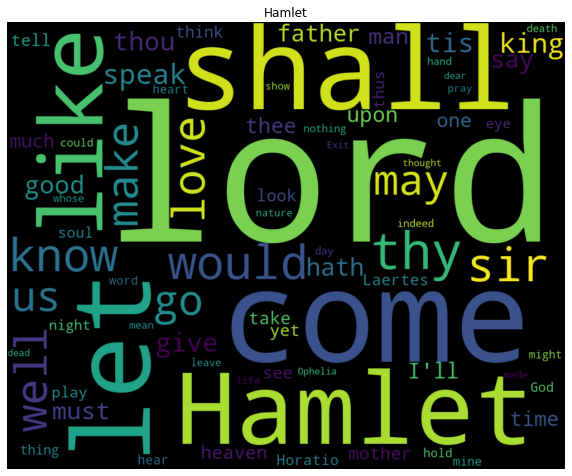

In [ ]:
plt.figure(figsize=(10,10))
drama = df[df['Play']==0]
drama = ' '.join(drama['PlayerLine'])
wordcloud = WordCloud(background_color='black',width=1000,height=800, max_words=75
                          ,relative_scaling=1,stopwords=stop_word).generate(drama)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hamlet')
plt.show()


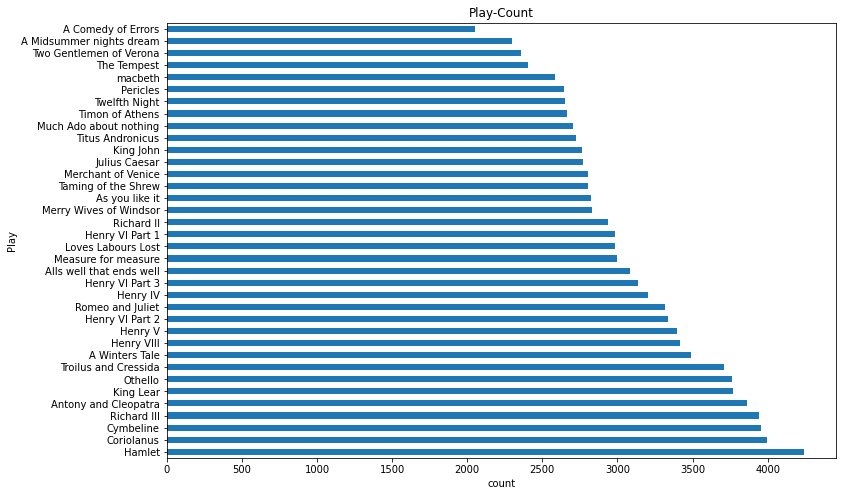

In [ ]:

count = [len(df.loc[df['Play']==x]) for x in range(0,36)]
freq_series = pd.Series(count)

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='barh')
ax.set_title('Play-Count')
ax.set_xlabel('count')
ax.set_ylabel('Play')
ax.set_yticklabels(requires.keys())

rects = ax.patches

In [ ]:
Play = np.array(df['Play'],dtype='int')
PlayerLine = np.array(df['PlayerLine'])

In [ ]:
print(Play)
print(PlayerLine)

[13 13 13 ...  8  8  8]
['ACT I' 'SCENE I. London. The palace.'
 'Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others'
 ... "Perform'd in this wide gap of time since first"
 "We were dissever'd: hastily lead away." 'Exeunt']


In [ ]:

def stopwords_removal(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    stop_words.extend([',','?','""',"''",'.','!', "'",'"',"'d","'ll",'[',']','--',':',';','///','$'])
    filtered_tokens = [i for i in tokens if not i in stop_words]
    return filtered_tokens

def stemming(tokens):
    stemmer = nltk.stem.porter.PorterStemmer()
    stemmed_tokens = [stemmer.stem(i) for i in tokens]
    return stemmed_tokens

def pre_process(text):
    tokens = text.lower()
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = stopwords_removal(tokens)
    final = stemming(tokens)
    return final

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(PlayerLine, Play, test_size=0.20,shuffle=True)

In [ ]:

vectorizer = CountVectorizer(max_features=15000,lowercase=True, analyzer=pre_process, binary=False)
representation = vectorizer.fit_transform(X_train)
# print(representation)

representation_df = pd.DataFrame(data = representation.toarray(), columns=sorted(vectorizer.vocabulary_.keys()))
print(representation_df)

       ''gamut  ''od  ''ti  ''twa  'A  ...  zenith  zephyr  zir  zodiac  zound
0            0     0     0      0   0  ...       0       0    0       0      0
1            0     0     0      0   0  ...       0       0    0       0      0
2            0     0     0      0   0  ...       0       0    0       0      0
3            0     0     0      0   0  ...       0       0    0       0      0
4            0     0     0      0   0  ...       0       0    0       0      0
...        ...   ...   ...    ...  ..  ...     ...     ...  ...     ...    ...
89111        0     0     0      0   0  ...       0       0    0       0      0
89112        0     0     0      0   0  ...       0       0    0       0      0
89113        0     0     0      0   0  ...       0       0    0       0      0
89114        0     0     0      0   0  ...       0       0    0       0      0
89115        0     0     0      0   0  ...       0       0    0       0      0

[89116 rows x 15000 columns]


In [ ]:
print(representation.shape)
print(representation_df.shape)

In [ ]:
clf= RandomForestClassifier()
clf.fit(representation,Y_train)

In [ ]:
prediction=clf.predict(vectorizer.transform(X_test))

In [ ]:
# evaluating the model using accuracy

print(mt.accuracy_score(Y_test,prediction,normalize=True))
print(mt.classification_report(Y_test,prediction))
print(mt.confusion_matrix(Y_test,prediction))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
clf = OneVsRestClassifier(SVC())
clf.fit(representation,Y_train)

In [ ]:
prediction=clf.predict(vectorizer.transform(X_test))

In [ ]:
# evaluating the model using accuracy

print(mt.accuracy_score(Y_test,prediction,normalize=True))
print(mt.classification_report(Y_test,prediction))
print(mt.confusion_matrix(Y_test,prediction))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(representation,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
prediction=clf.predict(vectorizer.transform(X_test))

In [ ]:
# evaluating the model using accuracy

print(mt.accuracy_score(Y_test,prediction,normalize=True))
print(mt.classification_report(Y_test,prediction))
print(mt.confusion_matrix(Y_test,prediction))

0.24259425493716338
              precision    recall  f1-score   support

           0       0.16      0.25      0.20       862
           1       0.21      0.30      0.25       824
           2       0.18      0.21      0.19       789
           3       0.20      0.21      0.21       826
           4       0.22      0.25      0.23       793
           5       0.21      0.21      0.21       780
           6       0.21      0.25      0.23       772
           7       0.29      0.33      0.31       720
           8       0.17      0.19      0.18       688
           9       0.18      0.23      0.20       672
          10       0.23      0.23      0.23       681
          11       0.21      0.19      0.20       617
          12       0.26      0.27      0.26       671
          13       0.26      0.23      0.24       635
          14       0.25      0.27      0.26       602
          15       0.20      0.16      0.18       609
          16       0.22      0.22      0.22       629
       